# Horse Or Human Prediction Using Convolutional Neural Network

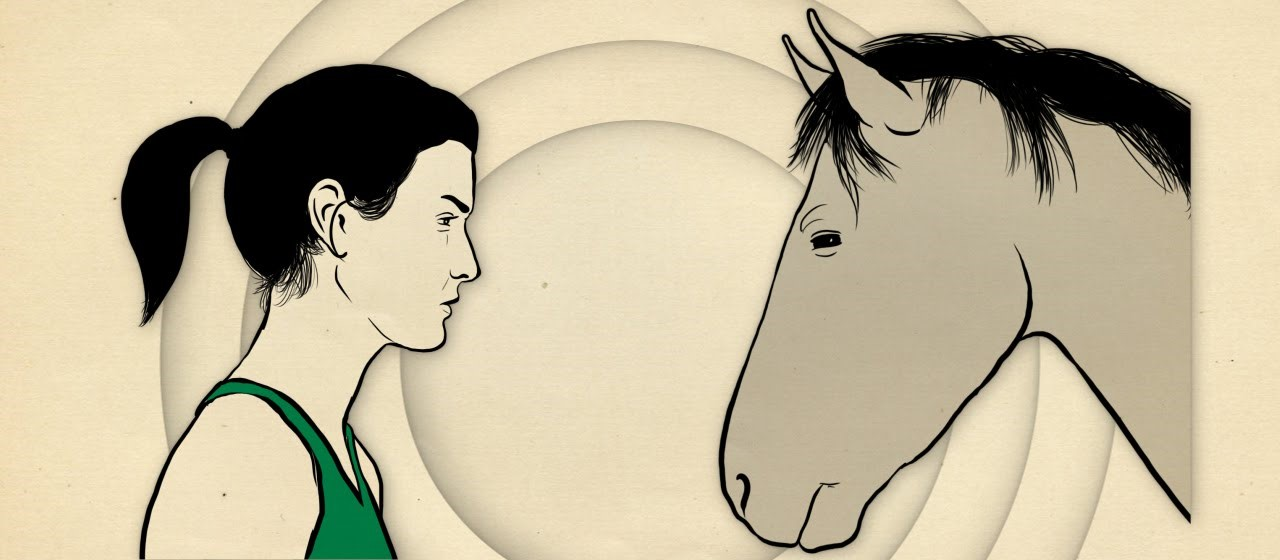

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img

<function keras.utils.image_utils.load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest', keep_aspect_ratio=False)>

In [2]:
# cheking the version of keras
keras.__version__

'2.10.0'

Hourse or Human data link
https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset

## Load Data

In [3]:
train_data_path=("C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train")
validation_data_path=("C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/validation")

## Data Processing

In [4]:
trainig_datagen=ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [5]:
train_data=trainig_datagen.flow_from_directory(train_data_path,
                                    target_size=(150,150),
                                    batch_size=32,
                                    class_mode='binary')

Found 1027 images belonging to 2 classes.


In [6]:
# To see class of dataset
train_data.class_indices

{'horses': 0, 'humans': 1}

In [7]:
vaild_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
vaild_data=vaild_datagen.flow_from_directory(validation_data_path,
                                    target_size=(150,150),
                                    batch_size=32,
                                    class_mode='binary')

Found 256 images belonging to 2 classes.


In [9]:
# To see class of dataset
vaild_data.class_indices

{'horses': 0, 'humans': 1}

In [10]:
def plotImages(image_arr):
    fig,axes=plt.subplots(1,5,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

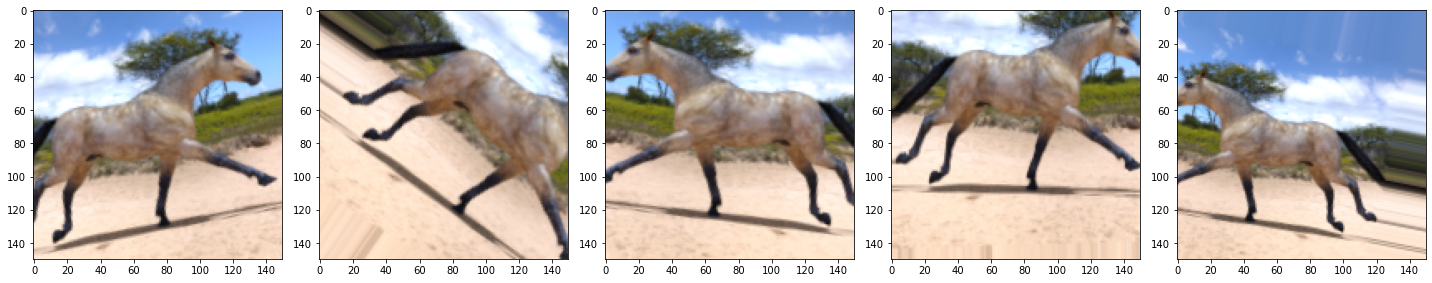

In [11]:
images=[train_data[0][0][0] for i in range(5)]
plotImages(images)

## Building CNN model

In [12]:
cnn_model=keras.models.Sequential([
                                   keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=64,kernel_size=3),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=128,kernel_size=3),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=256,kernel_size=3),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                                   keras.layers.Dropout(0.5),
                                   keras.layers.Flatten(),     # Neaural Network Building 
                                   keras.layers.Dense(units=128,activation='relu'),   # input layer
                                   keras.layers.Dropout(0.1),
                                   keras.layers.Dense(units=256,activation='relu'),
                                   keras.layers.Dropout(0.25),
                                   keras.layers.Dense(units=2,activation='softmax'),  # Output layer
    
                                  ])

In [13]:
# Complie the model
cnn_model.compile(optimizer=Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\Pranav\.continuum\ppp\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
model_path="C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/horse_or_human_predictors.h5"
checkpoint= ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,model='max')
callbacks_list=[checkpoint]

In [15]:
# train cnn model
history=cnn_model.fit(train_data,
                      epochs=100,
                      verbose=1,
                      validation_data=vaild_data,
                      callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.5638
Epoch 1: val_accuracy improved from -inf to 0.88672, saving model to C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human\horse_or_human_predictors.h5
33/33 [==============================] - 25s 724ms/step - loss: 0.6667 - accuracy: 0.5638 - val_loss: 0.5632 - val_accuracy: 0.8867
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.5774 - accuracy: 0.7050
Epoch 2: val_accuracy did not improve from 0.88672
33/33 [==============================] - 23s 702ms/step - loss: 0.5774 - accuracy: 0.7050 - val_loss: 0.4612 - val_accuracy: 0.7617
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.5364 - accuracy: 0.7400
Epoch 3: val_accuracy did not improve from 0.88672
33/33 [==============================] - 24s 726ms/step - loss: 0.5364 - accuracy: 0.7400 - val_loss: 0.5378 - val_accuracy: 0.6992
Epoch 4/100
33/33 [==========

Epoch 30/100
33/33 [==============================] - ETA: 0s - loss: 0.1907 - accuracy: 0.9309
Epoch 30: val_accuracy did not improve from 0.88672
33/33 [==============================] - 23s 705ms/step - loss: 0.1907 - accuracy: 0.9309 - val_loss: 3.2825 - val_accuracy: 0.5742
Epoch 31/100
33/33 [==============================] - ETA: 0s - loss: 0.1587 - accuracy: 0.9396
Epoch 31: val_accuracy did not improve from 0.88672
33/33 [==============================] - 23s 687ms/step - loss: 0.1587 - accuracy: 0.9396 - val_loss: 3.8456 - val_accuracy: 0.5664
Epoch 32/100
33/33 [==============================] - ETA: 0s - loss: 0.1537 - accuracy: 0.9406
Epoch 32: val_accuracy did not improve from 0.88672
33/33 [==============================] - 23s 691ms/step - loss: 0.1537 - accuracy: 0.9406 - val_loss: 3.1004 - val_accuracy: 0.6289
Epoch 33/100
33/33 [==============================] - ETA: 0s - loss: 0.1508 - accuracy: 0.9406
Epoch 33: val_accuracy did not improve from 0.88672
33/33 [=====

33/33 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 0.9727
Epoch 59: val_accuracy did not improve from 0.88672
33/33 [==============================] - 23s 687ms/step - loss: 0.0730 - accuracy: 0.9727 - val_loss: 3.0870 - val_accuracy: 0.6211
Epoch 60/100
33/33 [==============================] - ETA: 0s - loss: 0.0729 - accuracy: 0.9718
Epoch 60: val_accuracy did not improve from 0.88672
33/33 [==============================] - 23s 687ms/step - loss: 0.0729 - accuracy: 0.9718 - val_loss: 4.1039 - val_accuracy: 0.5625
Epoch 61/100
33/33 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.9796
Epoch 61: val_accuracy did not improve from 0.88672
33/33 [==============================] - 23s 685ms/step - loss: 0.0555 - accuracy: 0.9796 - val_loss: 4.3110 - val_accuracy: 0.5703
Epoch 62/100
33/33 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 0.9747
Epoch 62: val_accuracy did not improve from 0.88672
33/33 [==================

33/33 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9893
Epoch 88: val_accuracy did not improve from 0.88672
33/33 [==============================] - 23s 692ms/step - loss: 0.0380 - accuracy: 0.9893 - val_loss: 4.5334 - val_accuracy: 0.5781
Epoch 89/100
33/33 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9805
Epoch 89: val_accuracy did not improve from 0.88672
33/33 [==============================] - 23s 685ms/step - loss: 0.0508 - accuracy: 0.9805 - val_loss: 3.9023 - val_accuracy: 0.6328
Epoch 90/100
33/33 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.9864
Epoch 90: val_accuracy did not improve from 0.88672
33/33 [==============================] - 22s 680ms/step - loss: 0.0460 - accuracy: 0.9864 - val_loss: 3.4099 - val_accuracy: 0.6484
Epoch 91/100
33/33 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9883
Epoch 91: val_accuracy did not improve from 0.88672
33/33 [==================

## Visualization

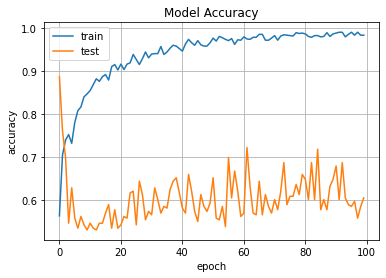

In [16]:
# Summerize the History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid(True)
plt.show()

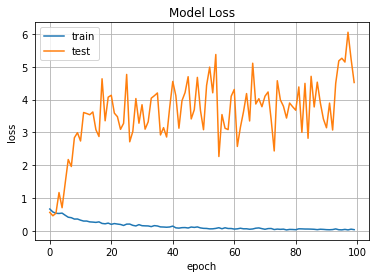

In [17]:
# Summerize the History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid(True)
plt.show()

In [23]:
model_path1 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/horse_or_human_predictors.h5" #new model.ipynb
model1 = keras.models.load_model(model_path1)



In [24]:
#horse image path
h1 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/horses/horse01-0.png"
h2 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/horses/horse02-2.png"
h3 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/horses/horse04-0.png"
h4 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/horses/horse06-0.png"
h5 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/horses/horse08-9.png"
h6 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/horses/horse19-0.png"
h7 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/horses/horse46-7.png"
h8 ="C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/horses/horse34-3.png"


In [25]:
#human image path
hu1 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/humans/human16-27.png"
hu2 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/humans/human14-18.png"
hu3 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/humans/human09-11.png"
hu4 ="C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/humans/human07-18.png"
hu5 ="C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/humans/human03-13.png"
hu6 = "C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/hourse vs human/archive/horse-or-human/train/humans/human02-14.png"

In [47]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array 
import keras.utils as image

import matplotlib.image as mpimg

def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size = (150, 150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result, "--->>>", pred)

  if pred == 0:
    print('Predicted>>> Horse')
  else:
    print('Predicted>>> Human')

In [48]:
for horse_or_human in [h1,h2,h3,h4,h5,h6,h7,h8, hu1,hu2,hu3,hu4,hu5,hu6]:
  pred_human_horse(model1, horse_or_human)

1/1 [==============================] - 0s 230ms/step
[[0.534 0.466]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 15ms/step
[[0.664 0.336]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 25ms/step
[[0.632 0.368]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 26ms/step
[[0.736 0.264]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 24ms/step
[[0.576 0.424]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 26ms/step
[[0.729 0.271]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 29ms/step
[[0.453 0.547]] --->>> 1
Predicted>>> Human
1/1 [==============================] - 0s 27ms/step
[[0.662 0.338]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 27ms/step
[[0.393 0.607]] --->>> 1
Predicted>>> Human
1/1 [==============================] - 0s 28ms/step
[[0.317 0.683]] --->>> 1
Predicted>>> Human
1/1 [==============================] - 